# Projeto Capstone: Previsão de inadimplência no crediário

O crediário hoje sofre com um índice alto de inadimplência, o que leva a 30% dos brasileiros a estarem negativos em algum órgão de proteção ao crédito.
Porém, apenas a informação de negativação é suficiente para conter a inadimplência? Não é que o parece.

## Objetivo

Construir um modelo preditivo de crédito que vai atribuir uma proposta (possível venda) a um risco utilizando informações:
- De cadastro do cliente
- Histórico de compras
- Dados de órgãos de proteção ao crédito

---
## Parte 01: Divisão e extração do dataset

### Extrair label
MDA é a nossa label: maior dias em atraso, ou seja, qual foi o máximo de dias que aquela venda atrasou. Valores negativos significam que a venda foi paga adiantada (antes do vencimento)

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
data = pd.read_csv('data/out.csv', sep=';')

# Substituir todos os NaN no dataset por zeros
features = data.fillna(method='ffill')
features = data.fillna(value='0')

labels = features[['mda']]
features = features.drop([features.columns[0], 'mda'], axis=1)
features.describe()

IOError: File data/out.csv does not exist

### Train/test split
Dividir o dataset em dados de treino e teste, 'embaralhando' para evitar qualquer bias do dataset.

In [22]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.2,
                                                                            random_state=0)

## Parte 02: Análise exploratória dos dados

Checar a relevância dos dados, bem como se algum pre-processamento pode ajudar na precisão ou generalização do modelo.

### Clustering de ocupações

Existem várias ocupação possíveis, tornando o modelo complexo demais em observar todas elas. A melhor forma é formar poucos clusters de dados para que o modelo fique mais simples.

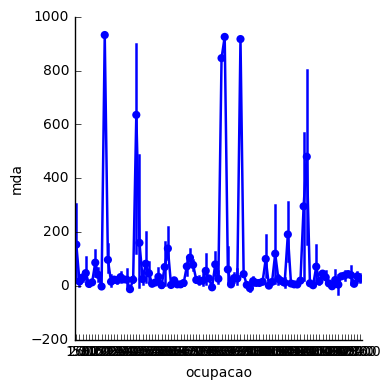

In [29]:
import seaborn as sns

sns.factorplot(data=data, x='ocupacao', y='mda')

## Parte xx: Treinamento do modelo:
WIP

In [7]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)
model.fit(features_train, labels_train)
print model.score(features_train, labels_train)
print model.score(features_test, labels_test)

0.954085101973
0.606102077016


/home/stefano/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
